In [345]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

---

# 2.1. Types of data and measurement scales

## 2.1.1. Categorical and qualitative variables

Type    | Explanation                                     | Example
--------|-------------------------------------------------|---------------------------------------
Nominal | Places an element in class or category          | Gender, nationality
Ordinal | Ranks elements without a fixed measurement unit | Michelin starts, customer satisfaction

## 2.1.2. Quantitative variables

Type     | Explanation                                                 | Example
---------|-------------------------------------------------------------|-----------------------------
Interval | Measures an element on a scale without a natural zero point | Time of day, degrees Celsius
Rational | Measures an element relative to some absolute zero point    | Length, duration


In practice, all observations of a continuous variable are discrete: a continuous length is measured up to a certain accuracy (e.g. one millimeter), thus turned into a discrete number. Nevertheless, we will consider length as a continuous variable.
Type       | Explanation                                                           | Example
-----------|-----------------------------------------------------------------------|--------------------------------------
Discrete   | Can only take a (in)finite countable number of values                 | Number of children, gymnastics scores
Continuous | Can take an continuum of values (a value can be divided at-infinitum) | Length, duration

# 2.2. The data matrix
Data is often presented in a matrix, with a row for each element or observation of a sample, and a column for every measured variable. A complete row in a data matrix is sometimes referred to as an observation vector. In this chapter, we will mainly treat so-called univariate and bivariate representations of variables. A univariate representation refers to one variable, while a bivariate representation refers to two variables simultaneously. Likewise, multivariate data is nothing but data consisting of several variables.

# 2.3. Representing univariate qualitative variables

[Text(0, 0.5, 'Cumulative sum'), (0.0, 1.05)]

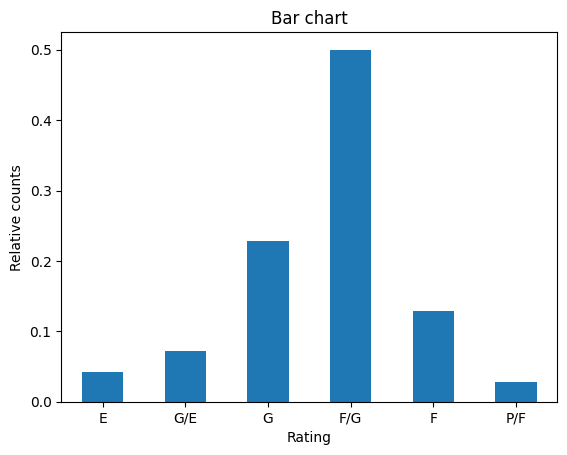

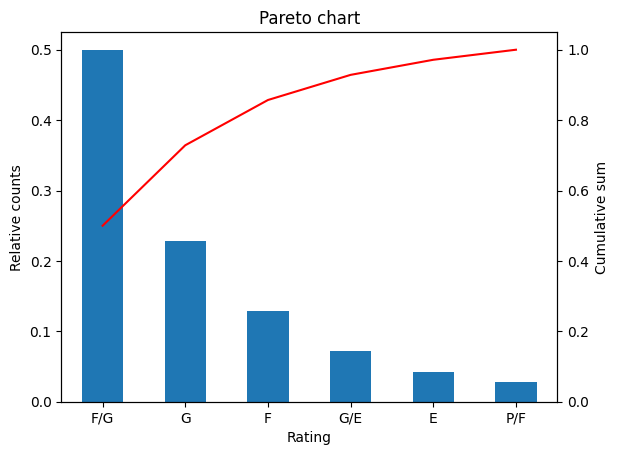

In [9]:
# Plotting a bar chart and a Pareto chart of grades.
grades = pd.DataFrame.from_dict(
    {
    'rating': 'E G/E G F/G F P/F'.split(),
    'count': [3, 5, 16, 35, 9, 2]
    }
).set_index('rating')
grades['rel_count'] = grades['count']/grades['count'].sum()
# Bar chart.
f1, a1 = plt.subplots()
grades['rel_count'].plot.bar(ax=a1)
a1.set(xlabel='Rating', ylabel='Relative counts', title='Bar chart')
a1.set_xticks(a1.get_xticks(), a1.get_xticklabels(), rotation=0, ha='center')
# Pareto chart.
# Plotting bar chart with decreasing frequency.
f2, a2 = plt.subplots()
grades_sorted = grades.sort_values(by='rel_count', ascending=False)
grades_sorted['cum_sum'] = np.cumsum(grades_sorted['rel_count'])
grades_sorted['rel_count'].plot.bar(ax=a2)
a2.set(xlabel='Rating', ylabel='Relative counts', title='Pareto chart')
a2.set_xticks(a2.get_xticks(), a2.get_xticklabels(), rotation=0, ha='center')
# Adding cumulative sums.
a3 = a2.twinx()
grades_sorted['cum_sum'].plot(ax=a3, color=(1,0,0))
a3.set(ylabel='Cumulative sum', ylim=(0,1.05))

# 2.4. Representing univariate quantitative variables

Plotting a barchart of relative frequencies of the first 42 lottery numbers. The horizontal reference line represents the theoretical prbability of $\frac{7}{42}=\frac{1}{6}$ that a specific number is drawn at any lottery drawing.


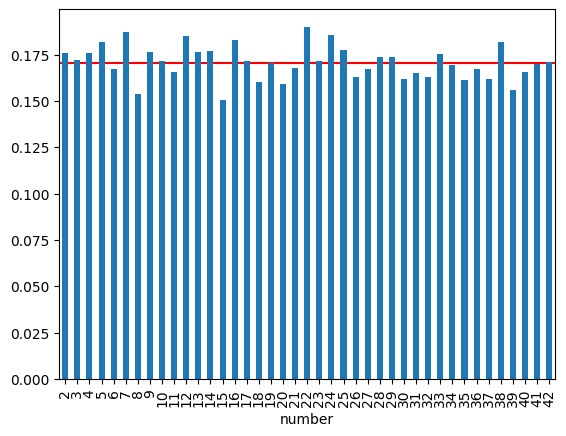

In [368]:
BALLS_PER_INNING = 7
lottery = pd.read_csv('data/lottery.csv', index_col=0)
lottery['rel_counts'] = BALLS_PER_INNING * lottery['counts']/lottery['counts'].sum()
f, a = plt.subplots()
lottery['rel_counts'].plot.bar(ax=a)
a.hlines(y=BALLS_PER_INNING/len(lottery), color=(1,0,0), xmin=-1, xmax = lottery.index.max() + 1, zorder=0)

Let us plot a histogram of tensile strengths of steel, binned by hardness. A transformation that is frequently used, instead of the original data, is the logarithmic transformation. Sometimes, this transformation ensures that we obtain a more or less symmetrical histogram with one peak. A disadvantage of histograms is that their ultimate form strongly depends on the number of intervals chosen. Too many classes provide too detailed an image, while too few display insufficient details. Typically, we work with 5-20 classes. A classic role of thumb iis to set the number of classes to the square root of the number of observations: $\sqrt{89} \approx 10$.

<Axes: xlabel='$\\log_{10}(\\mathrm{tensile strength}) [\\log_{10}(MPa)]$', ylabel='Counts'>

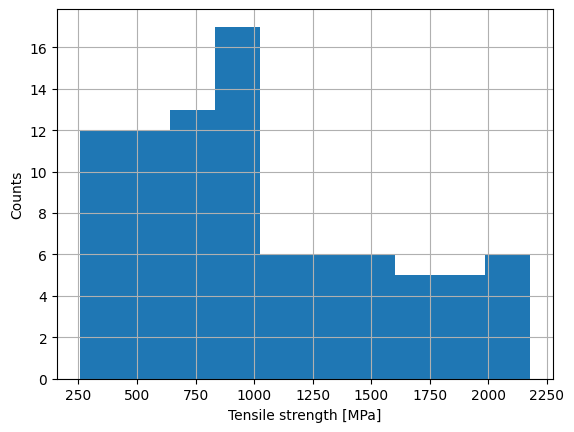

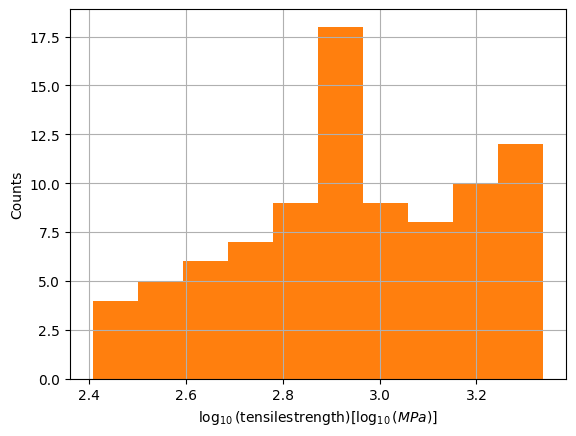

In [369]:
steel = pd.read_csv('data/steel.csv', delimiter=';')
steel.columns = ['hardness', 'tensile_strength']

bins = np.ceil(np.sqrt(len(steel))).astype(int) 

f1, a1 = plt.subplots()
steel['tensile_strength'].hist(ax=a1, bins=bins)
a1.set(xlabel='Tensile strength [MPa]', ylabel='Counts')

f2, a2 = plt.subplots()
steel['tensile_strength_log10'] = np.log10(steel['tensile_strength'])
steel['tensile_strength_log10'].hist(ax=a2, bins=bins)
a2.set(xlabel='$\log_{10}(\mathrm{tensile strength}) [\log_{10}(MPa)]$', ylabel='Counts')
steel['tensile_strength_log10'].hist(bins=bins)

To test whether sample data originated from a normally distributed population, the empirical cumulative distribution function is often used, e.g. in the **Kolmogorov-Smirnov test**. Here, we assume the null-hypothesis $H_0$ that the data originates from a normal distribution. Here, we see that the test statistic $D = 0.992$ and the $p$-value is $1.051 \cdot 10^{-184} < 0.05$, which gives enough evidence to reject the null-hypothesis. This means these samples **do not originate from a normal distribution**.

In [370]:
result = sp.stats.kstest(rvs=steel['tensile_strength_log10'], cdf=sp.stats.norm.cdf)
result

KstestResult(statistic=0.991947783819786, pvalue=1.0509631390703958e-184, statistic_location=2.406540180433955, statistic_sign=-1)

(array([  95.,  187.,  285.,  393.,  505.,  605.,  704.,  803.,  898.,
        1000.]),
 array([8.64817182e-04, 1.00642576e-01, 2.00420334e-01, 3.00198093e-01,
        3.99975851e-01, 4.99753610e-01, 5.99531368e-01, 6.99309127e-01,
        7.99086885e-01, 8.98864644e-01, 9.98642402e-01]),
 <BarContainer object of 10 artists>)

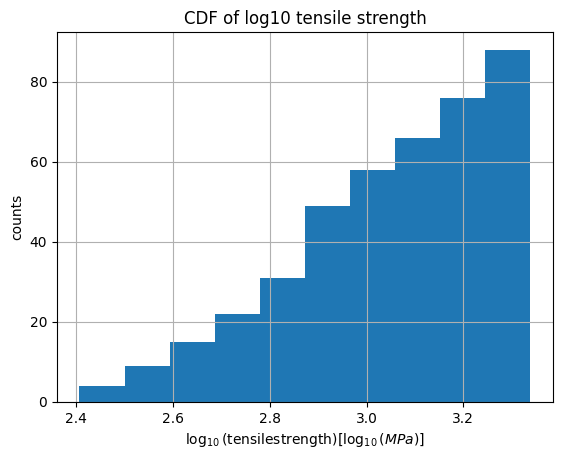

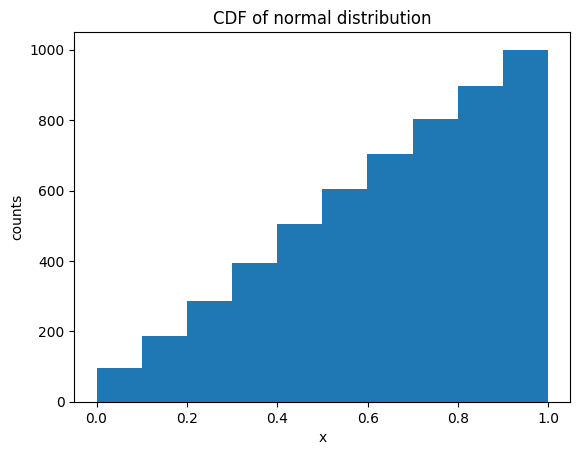

In [371]:
f1, a1 = plt.subplots()
steel['tensile_strength_log10'].hist(bins=bins, cumulative=True, ax=a1)
a1.set(xlabel='$\log_{10}(\mathrm{tensile strength}) [\log_{10}(MPa)]$', ylabel='counts', title='CDF of log10 tensile strength')

f2, a2 = plt.subplots()
a2.set(xlabel='x', ylabel='counts', title='CDF of normal distribution')
a2.hist(sp.stats.uniform.rvs(size=1000, random_state=np.random.default_rng()), cumulative=True)

# 2.5. Representing bivariate data
# 2.5.1 Qualitative variables




<Axes: xlabel='PriceGrade', ylabel='Count'>

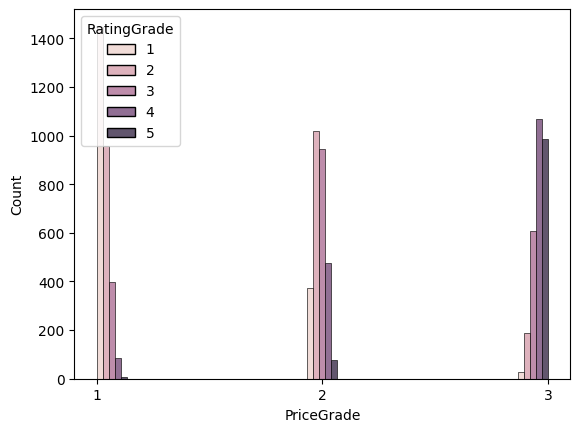

In [372]:
wine = pd.read_csv('data/wine.csv')
wine['LogPrice'] = np.log10(wine['Price'])

quantiles_rating_grade = np.linspace(0, 1, 6)
rating_grade_labels = np.linspace(1, len(quantiles_rating_grade) - 1, len(quantiles_rating_grade) - 1, dtype=int)
rating_grade, bounds = pd.qcut(wine['Rating'], quantiles_rating_grade, labels=rating_grade_labels, retbins=True)
wine['RatingGrade'] = rating_grade.astype(int)

quantiles_price_grade = np.linspace(0, 1, 4)
price_grade_labels = np.linspace(1, len(quantiles_price_grade) - 1, len(quantiles_price_grade) - 1, dtype=int)
price_grade, bounds = pd.qcut(wine['Price'], quantiles_price_grade, labels=price_grade_labels, retbins=True)
wine['PriceGrade'] = price_grade.astype(int)

f, a = plt.subplots()
a.set(xticks=price_grade_labels, xticklabels=price_grade_labels)
sns.histplot(ax=a, data=wine, x="PriceGrade", hue="RatingGrade", multiple='dodge')

# 2.5.2. Quantitative variables

Data concenring two quantitative variables can be represented graphically using a **scatter plot**. 

<Axes: xlabel='hardness', ylabel='tensile_strength'>

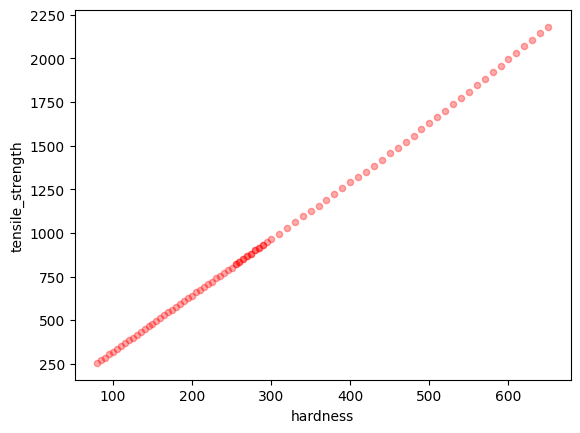

In [373]:
steel.plot.scatter(x='hardness', y='tensile_strength', color=(1,0,0,0.33))

# 2.6. Representing time series

If a variable is measured at successive time points, it is common to plot that variable on the vertical axis, put time on the horizontal axis, and ocnnect the successive data points by means of a straight line. Here, we plot the lap times of the 6 drivers who finished all 72 laps of the race with the most participants (24).

<Axes: xlabel='lap', ylabel='milliseconds'>

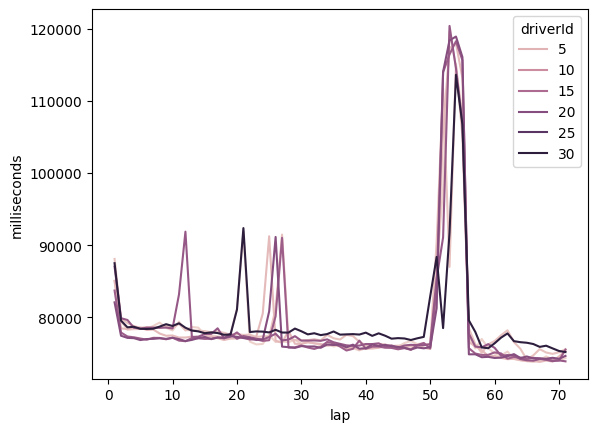

In [374]:
laps = pd.read_csv('data/laps.csv')
most_common_race = laps[laps['raceId'] == laps['raceId'].mode().item()]
finishing_racers = most_common_race[most_common_race['lap'] == most_common_race['lap'].max()].sort_values(by='position')['driverId']
sns.lineplot(data=most_common_race.loc[most_common_race['driverId'].isin(finishing_racers)], x='lap', y='milliseconds', hue='driverId')


# 2.7. Representing geographical data

Here, we plot a distribution of wildfires in Australia between August 2019 and September 2019.

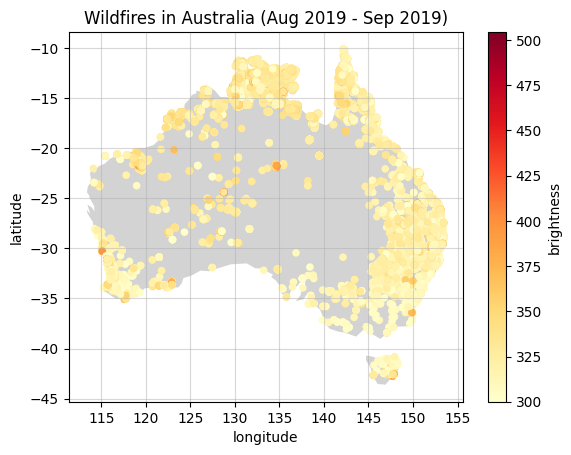

In [375]:
fires = pd.read_csv("data/fires.csv", usecols=["latitude", "longitude", "brightness", "acq_date"], parse_dates=["acq_date"])
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
australia = countries[countries["name"] == "Australia"]

f, a = plt.subplots()
fires.plot(x="longitude", y="latitude", kind="scatter", c="brightness", colormap="YlOrRd", ax=a)
australia.plot(color="lightgrey", ax=a, zorder=0)

first_month = fires["acq_date"].min().strftime("%b %Y")
last_month = fires["acq_date"].max().strftime("%b %Y")
a.set(title=f"Wildfires in Australia ({first_month} - {last_month})")
a.grid(alpha=0.5)

# 2.8. Representing multivariate data

By using different symbols for different categories in a graphical representation, multivariate data can also be displayed. This is called **stratification**. Here, we construct a scatter plot of car's energy efficiency in the city (km/l) versus their weight (kg). As a third variable, the car's weight is represented by the diameter of the markers. While the absolute units in the dataset are unclear, we can notice the following correlations:

- a car's energy efficiency scales inversely with its price i.e., cheaper cars are more efficient.
- a car's energy efficiency scales inversely with its weight i.e., lighter cars are more efficient.
- a car's price scales linearly with its weight i.e., heavier cars are more expensive.

We can further prove this by calculating the **Pearson's correlation matrix**, which indicates:

- $R(\mathrm{mpg, price}) = -0.686$, i.e. strong **negative correlation** between a car's efficiency and price.
- $R(\mathrm{mpg, weight}) = -0.757$, i.e. strong **negative correlation** between a car's efficiency and weight.
- $R(\mathrm{weight, price}) = 0.835$, i.e. very strong **positive correlation** between a car's weight and price.


,curbweight,citympg,price
curbweight,1.000000,-0.757414,0.835305
citympg,-0.757414,1.000000,-0.685751
price,0.835305,-0.685751,1.000000


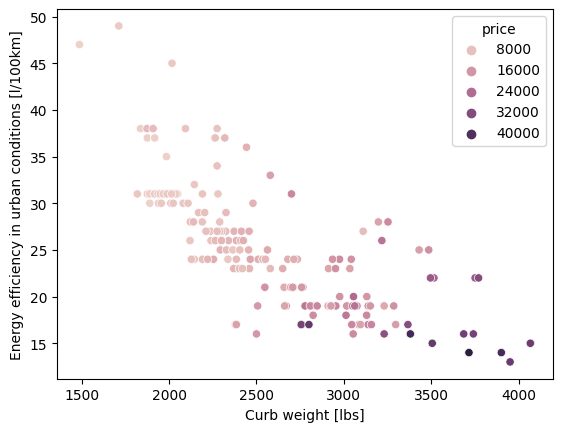

In [377]:
cars = pd.read_csv('data/cars.csv', usecols=['curbweight', 'citympg', 'price'])

f, a = plt.subplots()
sns.scatterplot(data=cars, x="curbweight", y="citympg", hue="price", ax=a)
a.set(xlabel="Curb weight [lbs]", ylabel="Energy efficiency in urban conditions [l/100km]")
cars.corr()

---